In [1]:
from skimage import io
import imageio
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import numpy as np

In [2]:
images = []
images_luminance = []
for i in range(19,34):
    image = io.imread("data/IMG_00"+str(i)+".JPG")
    gray_image = np.mean(image, axis=2)
    images_luminance.append(gray_image)
    images.append(image)

In [3]:
coords = []

for i,image in enumerate(images):
    image_grayscale = images_luminance[i]
    max_brightness_coord = np.unravel_index(np.argmax(image_grayscale[:,2800:2801]), image_grayscale[:,2800:2801].shape)
    max_brightness_coord = (max_brightness_coord[0],max_brightness_coord[1]+2800)
    
    coords.append(max_brightness_coord)

In [4]:
valuesrgb = []

for i,coord in enumerate(coords):
    values = images[i][coord[0],coord[1]]
    magnitude = np.linalg.norm(values)
    values = values / magnitude
#     max_val = np.max(values)
#     ratio = 255/max_val
    valuesrgb.append(values)

In [5]:
valuesrgb = np.stack(valuesrgb)

In [6]:
ones_column = np.ones((15, 1))
valuesrgb = np.hstack((valuesrgb, ones_column))

In [7]:
valuesrgb

array([[0.98058793, 0.14612683, 0.13074506, 1.        ],
       [0.94844704, 0.31614901, 0.0223164 , 1.        ],
       [0.88090916, 0.47327277, 0.00345455, 1.        ],
       [0.79432315, 0.60742358, 0.00934498, 1.        ],
       [0.67601127, 0.73688432, 0.00320384, 1.        ],
       [0.39280454, 0.91059234, 0.12855421, 1.        ],
       [0.25720334, 0.89845003, 0.35585668, 1.        ],
       [0.19078794, 0.81084873, 0.55328501, 1.        ],
       [0.18859626, 0.77567818, 0.6022913 , 1.        ],
       [0.14220832, 0.72555263, 0.67331284, 1.        ],
       [0.14403108, 0.68488248, 0.71427658, 1.        ],
       [0.23896533, 0.58985112, 0.77134378, 1.        ],
       [0.51930723, 0.34108345, 0.78357009, 1.        ],
       [0.63625979, 0.14271248, 0.75816003, 1.        ],
       [0.29133464, 0.        , 0.9566212 , 1.        ]])

In [8]:
output = np.array([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7])

In [9]:
coefficients, residuals, rank, singular_values = np.linalg.lstsq(valuesrgb, output, rcond=None)

In [10]:
print(coefficients)

[ 1.85983965  1.53812528  7.49806793 -1.47188758]


In [11]:
heights = [1.6,2.5]

In [12]:
image0 = io.imread("data/IMG_0036.JPG")
image1 = io.imread("data/IMG_0037.JPG")
gray_image0 = np.mean(image0, axis=2)
gray_image1 = np.mean(image1, axis=2)
max_brightness_coord0 = np.unravel_index(np.argmax(gray_image0[:,2800:2801]), gray_image0[:,2800:2801].shape)
max_brightness_coord0 = (max_brightness_coord0[0],max_brightness_coord0[1]+2800)
max_brightness_coord1 = np.unravel_index(np.argmax(gray_image1[:,2800:2801]), gray_image1[:,2800:2801].shape)
max_brightness_coord1 = (max_brightness_coord1[0],max_brightness_coord1[1]+2800)

print(max_brightness_coord0)
print(max_brightness_coord1)

(2497, 2800)
(2068, 2800)


In [13]:
def get_position_from_coord(x):
    return -0.0020979020979021*x+6.8384615384615

In [14]:
examples_coordinates = [(0,1.3),(3,1.3),(6,1.3),(1,2.6),(4,2.6),(7,2.6),(2,3.8),(5,3.8),(2,5.5),(5,5.5),(3,6.5),(5,6.5)]

In [15]:
images_guess = []
images_luminance_guess = []
for i in range(46,59):
    if i == 55:
        continue
    image = io.imread("data/IMG_00"+str(i)+".JPG")
    gray_image = np.mean(image, axis=2)
    images_luminance_guess.append(gray_image)
    images_guess.append(image)

In [16]:
positions_estimated = []

for i,image in enumerate(images_guess):
    grayimage = images_luminance_guess[i]
    max_brightness_coord = np.unravel_index(np.argmax(grayimage[:,2800:2801]), grayimage[:,2800:2801].shape)
    max_brightness_coord = (max_brightness_coord[0],max_brightness_coord[1]+2800)
    values = image[max_brightness_coord[0],max_brightness_coord[1]]
    magnitude = np.linalg.norm(values)
    values = values / magnitude
    values = np.append(values,[1])
    x_guess = np.sum(values*coefficients)
    y_guess = get_position_from_coord(max_brightness_coord[0])
    positions_estimated.append((round(x_guess,1),round(y_guess,1)))


In [26]:
x = 0
y = 0

for i in range(12):
    print("")
    print(examples_coordinates[i])
    print(positions_estimated[i])
    x += abs(round(examples_coordinates[i][0]-positions_estimated[i][0],1))
    y += abs(round(examples_coordinates[i][1]-positions_estimated[i][1],1))
    print(abs(round(examples_coordinates[i][0]-positions_estimated[i][0],1)))
    print(abs(round(examples_coordinates[i][1]-positions_estimated[i][1],1)))
    
x /= 12
y /= 12
print(x)
print(y)


(0, 1.3)
(1.4, 1.5)
1.4
0.2

(3, 1.3)
(3.1, 1.3)
0.1
0.0

(6, 1.3)
(5.9, 1.3)
0.1
0.0

(1, 2.6)
(0.9, 2.5)
0.1
0.1

(4, 2.6)
(4.4, 2.4)
0.4
0.2

(7, 2.6)
(6.3, 2.5)
0.7
0.1

(2, 3.8)
(0.9, 3.6)
1.1
0.2

(5, 3.8)
(5.2, 3.5)
0.2
0.3

(2, 5.5)
(0.9, 4.9)
1.1
0.6

(5, 5.5)
(5.3, 4.9)
0.3
0.6

(3, 6.5)
(2.4, 5.7)
0.6
0.8

(5, 6.5)
(5.4, 5.8)
0.4
0.7
0.5416666666666666
0.3166666666666667


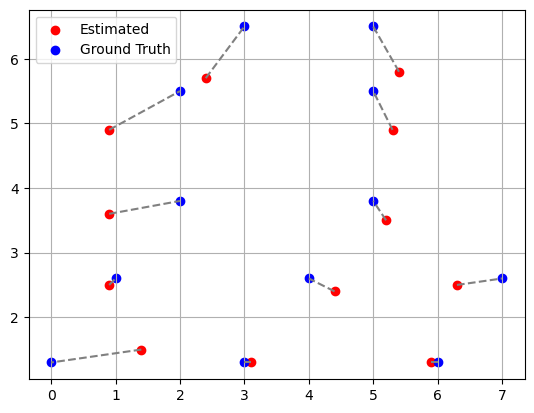

In [25]:
plt.scatter(*zip(*positions_estimated), color='red', label='Estimated')

# Plot the expected coordinates
plt.scatter(*zip(*examples_coordinates), color='blue', label='Ground Truth')

plt.grid(True)

plt.legend()

# Connect the expected to calculated with lines
for calc, exp in zip(positions_estimated, examples_coordinates):
    plt.plot([calc[0], exp[0]], [calc[1], exp[1]], color='gray', linestyle='dashed')

In [45]:
mov = imageio.get_reader('data/image1.mov')
frames = []
frames_gray = []
for i,frame in enumerate(mov):
    frame_array = np.array(frame)
    frame_array_gray = np.mean(frame_array, axis=2)
    frames_gray.append(frame_array_gray)
    frames.append(frame_array)

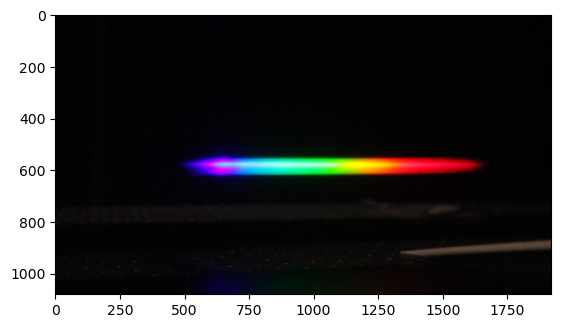

In [28]:
plt.imshow(frames[50])

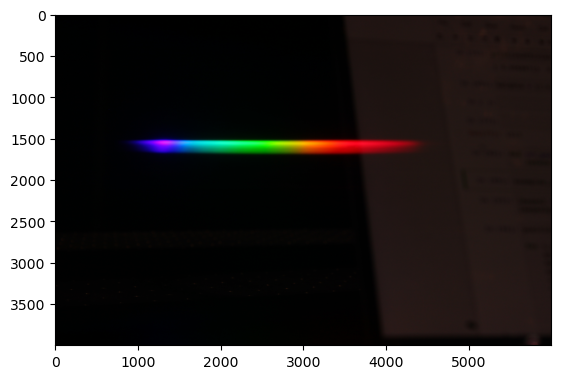

In [29]:
plt.imshow(images_guess[6])

In [30]:
print(1520-350)

1170


In [31]:
def get_position_from_coord_video(x):
    return -0.0083333333333333*x+7.1666666666667

In [46]:
guesses = []

for i,image in enumerate(frames):
    grayimage = frames_gray[i]
    max_brightness_coord = np.unravel_index(np.argmax(grayimage[:,900:901]), grayimage[:,900:901].shape)
    max_brightness_coord = (max_brightness_coord[0],max_brightness_coord[1]+900)
    values = image[max_brightness_coord[0],max_brightness_coord[1]]
    magnitude = np.linalg.norm(values)
    values = values / magnitude
    values = np.append(values,[1])
    x_guess = np.sum(values*coefficients)
    y_guess = get_position_from_coord_video(max_brightness_coord[0])
    guesses.append((round(x_guess,1),round(y_guess,1)))

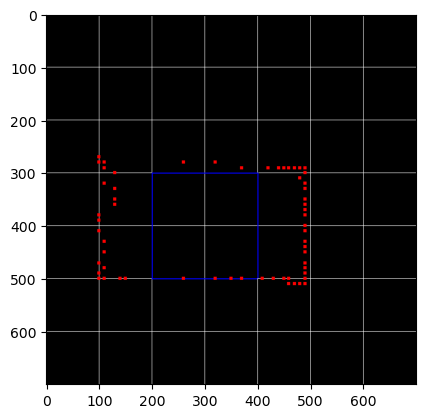

In [57]:
result_video = []
frame = np.zeros((700,700,3))
for m in range(0,700,100):
    for n in range(700):
        frame[m,n] = np.array([1,1,1])
for m in range(0,700,100):
    for n in range(700):
        frame[n,m] = np.array([1,1,1])
for m in range(200,400):
    frame[300,m] = np.array([0,0,1])
    frame[301,m] = np.array([0,0,1])
    frame[500,m] = np.array([0,0,1])
    frame[501,m] = np.array([0,0,1])
for m in range(300,500):
    frame[m,400] = np.array([0,0,1])
    frame[m,401] = np.array([0,0,1])
    frame[m,200] = np.array([0,0,1])
    frame[m,201] = np.array([0,0,1])
for i in range(21,149):
    column,row = guesses[i]
    column = int(column*100)
    row = 700-int(row*100)
    if column > 0 and column < 700 and row > 0 and row < 700:
        for m in range(row-3,row+3):
            for n in range(column-3,column+3):
                frame[m,n] = np.array([1,0,0])
    result_video.append(frame)
plt.imshow(frame)

In [51]:
writer = imageio.get_writer('video.mp4', codec='libx264', fps=30)

# Write each frame to the video
for frame in result_video:
    writer.append_data(frame)

# Close the writer to finalize the video
writer.close()

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (700, 700) to (704, 704) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
[swscaler @ 0x7f8488008000] Warning: data is not aligned! This can lead to a speed loss
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warnin

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

In [35]:
mov = imageio.get_reader('data/image2.mov')
frames = []
frames_gray = []
for i,frame in enumerate(mov):
    frame_array = np.array(frame)
    frame_array_gray = np.mean(frame_array, axis=2)
    frames_gray.append(frame_array_gray)
    frames.append(frame_array)

In [36]:
guesses = []

for i,image in enumerate(frames):
    grayimage = frames_gray[i]
    max_brightness_coord = np.unravel_index(np.argmax(grayimage[:,900:901]), grayimage[:,900:901].shape)
    max_brightness_coord = (max_brightness_coord[0],max_brightness_coord[1]+900)
    values = image[max_brightness_coord[0],max_brightness_coord[1]]
    magnitude = np.linalg.norm(values)
    values = values / magnitude
    values = np.append(values,[1])
    x_guess = np.sum(values*coefficients)
    y_guess = get_position_from_coord_video(max_brightness_coord[0])
    guesses.append((round(x_guess,1),round(y_guess,1)))

In [39]:
result_video = []
for i in range(111):
    column,row = guesses[i]
    column = int(column*100)
    row = 700-int(row*100)
    frame = np.zeros((700,700,3))
    for m in range(0,700,100):
        for n in range(700):
            frame[m,n] = np.array([1,1,1])
    for m in range(0,700,100):
        for n in range(700):
            frame[n,m] = np.array([1,1,1])
    if column > 0 and column < 700 and row > 0 and row < 700:
        for m in range(row-5,row+5):
            for n in range(column-5,column+5):
                frame[m,n] = np.array([1,0,0])
    result_video.append(frame)

In [180]:
writer = imageio.get_writer('video2.mp4', codec='libx264', fps=15)

# Write each frame to the video
for frame in result_video:
    writer.append_data(frame)

# Close the writer to finalize the video
writer.close()

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (700, 700) to (704, 704) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x7fd7b0008000] Warning: data is not aligned! This can lead to a speed loss
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warnin

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

In [181]:
mov = imageio.get_reader('data/image4.mov')
frames = []
frames_gray = []
for i,frame in enumerate(mov):
    frame_array = np.array(frame)
    frame_array_gray = np.mean(frame_array, axis=2)
    frames_gray.append(frame_array_gray)
    frames.append(frame_array)

In [183]:
guesses = []

for i,image in enumerate(frames):
    grayimage = frames_gray[i]
    max_brightness_coord = np.unravel_index(np.argmax(grayimage[:,900:901]), grayimage[:,900:901].shape)
    max_brightness_coord = (max_brightness_coord[0],max_brightness_coord[1]+900)
    values = image[max_brightness_coord[0],max_brightness_coord[1]]
    magnitude = np.linalg.norm(values)
    values = values / magnitude
    values = np.append(values,[1])
    x_guess = np.sum(values*coefficients)
    y_guess = get_position_from_coord_video(max_brightness_coord[0])
    guesses.append((round(x_guess,1),round(y_guess,1)))

In [184]:
result_video = []
for i in range(111):
    column,row = guesses[i]
    column = int(column*100)
    row = 700-int(row*100)
    frame = np.zeros((700,700,3))
    for m in range(0,700,100):
        for n in range(700):
            frame[m,n] = np.array([1,1,1])
    for m in range(0,700,100):
        for n in range(700):
            frame[n,m] = np.array([1,1,1])
    if column > 0 and column < 700 and row > 0 and row < 700:
        for m in range(row-5,row+5):
            for n in range(column-5,column+5):
                frame[m,n] = np.array([1,0,0])
    result_video.append(frame)

In [185]:
writer = imageio.get_writer('video4.mp4', codec='libx264', fps=15)

# Write each frame to the video
for frame in result_video:
    writer.append_data(frame)

# Close the writer to finalize the video
writer.close()

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (700, 700) to (704, 704) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x7fc468008000] Warning: data is not aligned! This can lead to a speed loss
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warnin

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0